In [ ]:
from datetime import datetime
from plotnine import *
import pandas as pd

import numpy as np
import re


## 2 . Billboard Top 100 Dataset

In [ ]:
data_path = "https://raw.githubusercontent.com/frandiego/data/master/billboard.csv"
df = pd.read_csv(data_path)
df.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21,wk22,wk23,wk24,wk25,wk26,wk27,wk28,wk29,wk30,wk31,wk32,wk33,wk34,wk35,...,wk37,wk38,wk39,wk40,wk41,wk42,wk43,wk44,wk45,wk46,wk47,wk48,wk49,wk50,wk51,wk52,wk53,wk54,wk55,wk56,wk57,wk58,wk59,wk60,wk61,wk62,wk63,wk64,wk65,wk66,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0,51.0,47.0,44.0,38.0,28.0,22.0,18.0,18.0,14.0,12.0,7.0,6.0,6.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,...,5.0,9.0,9.0,15.0,14.0,13.0,14.0,16.0,17.0,21.0,22.0,24.0,28.0,33.0,42.0,42.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0,59.0,61.0,66.0,72.0,76.0,75.0,67.0,73.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0,70.0,75.0,76.0,78.0,85.0,92.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1. Melt the dataframe, using `["year","artist","track","time","date.entered"]` , the variable name should be `week`and the value name `rank`.

In [ ]:
# your code here

In [ ]:
df.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


### 2.2. Clean columns names (remove everty but lower letter or underscores _ )

In [ ]:
# your code here

In [ ]:
df.head()

,year,artist,track,time,date_entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


### 2.3. Tidy data types
 * week should be and integer
 * rank should be an integer (whithout NA)
 * date_entered should be a date

In [ ]:
# your code here

In [ ]:
df.head()

,year,artist,track,time,date_entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57


### 2.4 What happen with the column `date_entered`? Is it fixed or dinamic? Create a dynamic column called `date` with the information of the date (Tricky exercise). 
* Check pd.to_timedelta function

In [ ]:
# your code here

### 2.5 Do we have any redundant column? Remove it


In [ ]:
# your code here

,artist,track,time,date_entered,week,rank,date
0,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87,2000-02-26
1,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91,2000-09-02
2,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81,2000-04-08
3,3 Doors Down,Loser,4:24,2000-10-21,1,76,2000-10-21
4,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57,2000-04-15


### 2.6 Convert the column `time` into an integer column with the number of seconds '4:22' -> 262

In [ ]:
# your code here

In [ ]:
df.head()

,artist,track,time,date_entered,week,rank,date
0,2 Pac,Baby Don't Cry (Keep...,262,2000-02-26,1,87,2000-02-26
1,2Ge+her,The Hardest Part Of ...,195,2000-09-02,1,91,2000-09-02
2,3 Doors Down,Kryptonite,233,2000-04-08,1,81,2000-04-08
3,3 Doors Down,Loser,264,2000-10-21,1,76,2000-10-21
4,504 Boyz,Wobble Wobble,215,2000-04-15,1,57,2000-04-15


### 2.7. Dou you remember the third rule of Tidy Data Manifesto (No more than one observational unit per table). If we watch our data we have two tables in the same dataset, one table with the information of the artist, track, time and date_entered, (with the information of the song) and another table with the columns week, rank, and date ( the information of the performance of the song in the billboard dataset). We should separate both tables, but first, create a columns with the `song_id` to have an identificate of the song that will allow us to split the dataframe in two. So:
1. create a dataframe called `df_song` with the variables ['artist', 'track', 'time', 'date_entered']
2. add a song id to this dataset


In [ ]:
# your code here

,artist,track,time,date_entered,song_id
0,2 Pac,Baby Don't Cry (Keep...,262,2000-02-26,0
1,2Ge+her,The Hardest Part Of ...,195,2000-09-02,1
2,3 Doors Down,Kryptonite,233,2000-04-08,2
3,3 Doors Down,Loser,264,2000-10-21,3
4,504 Boyz,Wobble Wobble,215,2000-04-15,4
...,...,...,...,...,...
312,Yankee Grey,Another Nine Minutes,190,2000-04-29,312
313,"Yearwood, Trisha",Real Live Woman,235,2000-04-01,313
314,Ying Yang Twins,Whistle While You Tw...,259,2000-03-18,314
315,Zombie Nation,Kernkraft 400,210,2000-09-02,315


### 2.8 Add the `song_id` to the original dataset

In [ ]:
# your code here

In [ ]:
# your code here

,artist,track,time,date_entered,week,rank,date,song_id
0,2 Pac,Baby Don't Cry (Keep...,262,2000-02-26,1,87,2000-02-26,0
1,2 Pac,Baby Don't Cry (Keep...,262,2000-02-26,2,82,2000-03-04,0
2,2 Pac,Baby Don't Cry (Keep...,262,2000-02-26,3,72,2000-03-11,0
3,2 Pac,Baby Don't Cry (Keep...,262,2000-02-26,4,77,2000-03-18,0
4,2 Pac,Baby Don't Cry (Keep...,262,2000-02-26,5,87,2000-03-25,0
...,...,...,...,...,...,...,...,...
5302,matchbox twenty,Bent,252,2000-04-29,35,33,2000-12-23,316
5303,matchbox twenty,Bent,252,2000-04-29,36,37,2000-12-30,316
5304,matchbox twenty,Bent,252,2000-04-29,37,38,2001-01-06,316
5305,matchbox twenty,Bent,252,2000-04-29,38,38,2001-01-13,316


### 2.9 Create the dataframe `df_rank` with the [`song_id`, `date`, `week`, `rank`] variables[link text](https://)

In [ ]:
# your code here

,song_id,date,week,rank
0,0,2000-02-26,1,87
1,0,2000-03-04,2,82
2,0,2000-03-11,3,72
3,0,2000-03-18,4,77
4,0,2000-03-25,5,87
...,...,...,...,...
5302,316,2000-12-23,35,33
5303,316,2000-12-30,36,37
5304,316,2001-01-06,37,38
5305,316,2001-01-13,38,38


### 2.10 Plot the rank over time of a song (ie a Carlos `Santana` song)

In [ ]:
# your code here

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


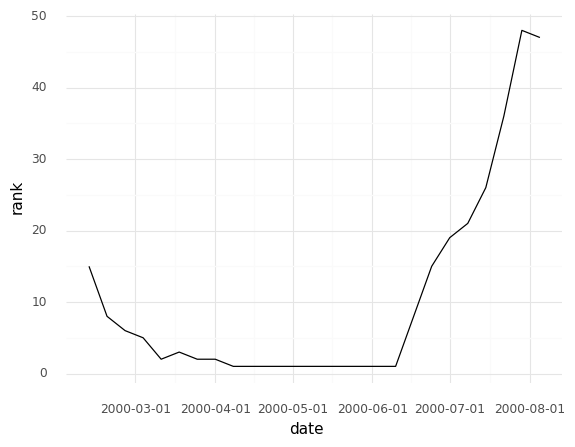

<ggplot: (8763695402160)>